# Discriminante Lineal. Tarea 2
### Equipo 11
- Iñaki Fernandez Fiscal
- Guillermo Arredondo Renero
- Mauricio Vazquez Moran

El objetivo de la segunda tarea es realizar un programa en R que codifique el algoritmo de análisis discriminante lineal. Se asumirá que todas las variables independientes son continuas con distribución normal.

## Ejercicio de previsualización del dataset Iris

In [1]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

In [2]:
usePackage('ggplot2')
usePackage('dplyr')
usePackage('GGally')

In [3]:
head(iris)
iris$Species

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


[1] setosa     setosa     setosa     setosa     setosa     setosa    
  [7] setosa     setosa     setosa     setosa     setosa     setosa    
 [13] setosa     setosa     setosa     setosa     setosa     setosa    
 [19] setosa     setosa     setosa     setosa     setosa     setosa    
 [25] setosa     setosa     setosa     setosa     setosa     setosa    
 [31] setosa     setosa     setosa     setosa     setosa     setosa    
 [37] setosa     setosa     setosa     setosa     setosa     setosa    
 [43] setosa     setosa     setosa     setosa     setosa     setosa    
 [49] setosa     setosa     versicolor versicolor versicolor versicolor
 [55] versicolor versicolor versicolor versicolor versicolor versicolor
 [61] versicolor versicolor versicolor versicolor versicolor versicolor
 [67] versicolor versicolor versicolor versicolor versicolor versicolor
 [73] versicolor versicolor versicolor versicolor versicolor versicolor
 [79] versicolor versicolor versicolor versicolor versicolor versicolor
 [85] versicolor versicolor versicolor versicolor versicolor versicolor
 [91] versicolor versicolor versicolor versicolor versicolor versicolor
 [97] versicolor versicolor versicolor versicolor virginica  virginica 
[103] virginica  virginica  virginica  virginica  virginica  virginica 
[109] virginica  virginica  virginica  virginica  virginica  virginica 
[115] virginica  virginica  virginica  virginica  virginica  virginica 
[121] virginica  virginica  virginica  virginica  virginica  virginica 
[127] virginica  virginica  virginica  virginica  virginica  virginica 
[133] virginica  virginica  virginica  virginica  virginica  virginica 
[139] virginica  virginica  virginica  virginica  virginica  virginica 
[145] virginica  virginica  virginica  virginica  virginica  virginica 
Levels: setosa versicolor virginica

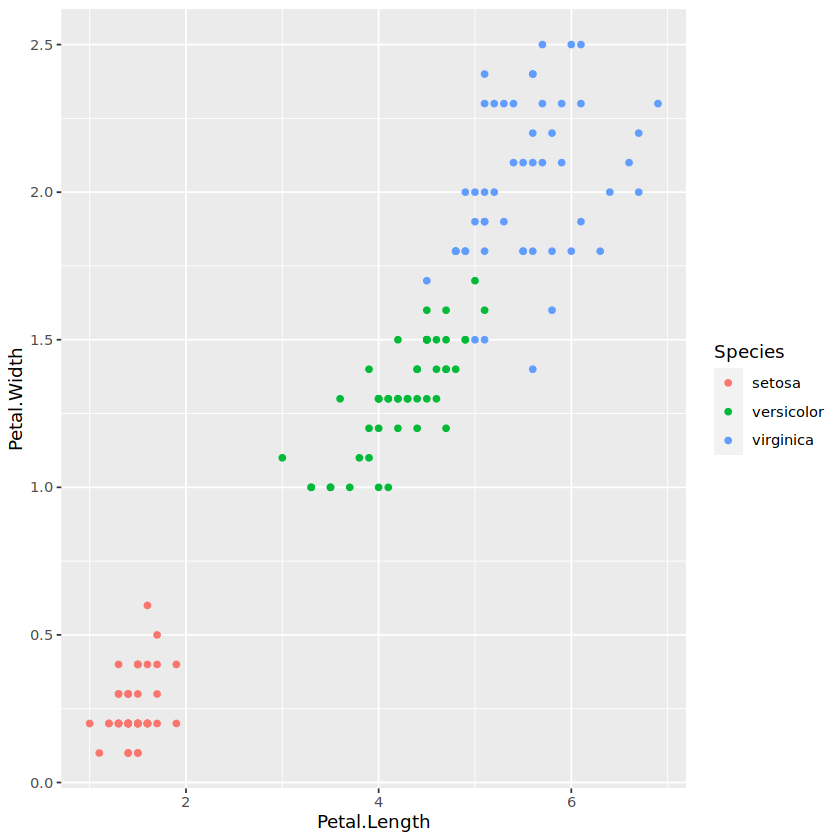

In [4]:
ggplot(iris) + geom_point(aes(y=Petal.Width, x=Petal.Length, color=Species))

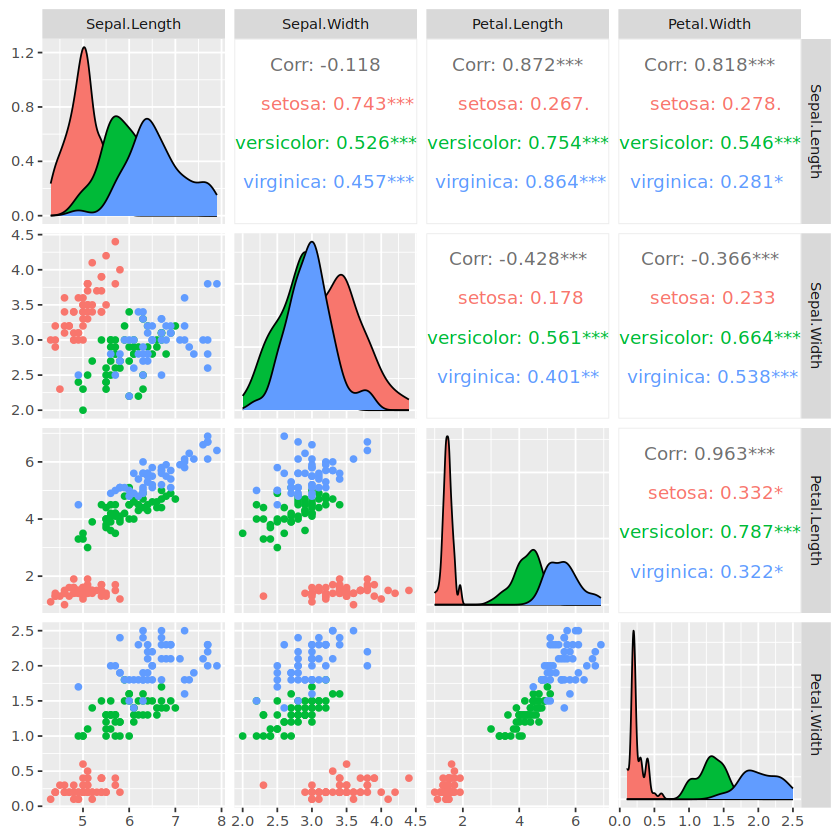

In [5]:
iris %>% 
     select(-Species) %>% 
     ggpairs(aes(color=iris$Species))

1. Crear una función que calcule la estimación de la probabilidad a-priori para una clase. (2 puntos)

Nombre de función: apriori
Parámetros: 
a) Data frame con los datos
b) Nombre de la columna que contiene la clase a predecir
c) Clase sobre la que se calculará estimación de la probabilidad a-priori

Regresa:
Probabilidad a-priori

In [6]:
usePackage('deplyr')
usePackage('tidyverse')
usePackage('gtools')

Warning message:
“package ‘deplyr’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”


In [7]:
library(dplyr)
library(tidyverse)
library(gtools)

In [8]:
apriori <- function(data_frame, columna_a_predecir, clase){
    result <- (nrow(filter(data_frame, columna_a_predecir == clase))) / (nrow(data_frame))
    return (result)
}

In [9]:
prueba_ap <- apriori(iris, iris$Species, 'setosa')
prueba_ap

[1] 0.3333333

In [10]:
#filter(iris, iris$Species == "setosa")

2. Crear una función que calcule la estimación de la media del PDF para una clase. (2 puntos)

Nombre de función: media
Parámetros: 
a) Data frame con los datos
b) Nombre de la columna que contiene la clase a predecir
c) Lista con los nombres de las variables independientes con los que se calculará la media. 
d) Clase sobre la que se calculará la estimación de la media

Regresa:
Vector con la media donde cada elemento mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro

In [11]:
media <- function(df, col_predecir, lista_independientes, clase_estimacion){
    df %>% select(lista_independientes)%>% filter(col_predecir==clase_estimacion) %>% colMeans(.) %>%  return
}

3. Crear una función que calcule la estimación de la varianza/covarianza del PDF para todos los datos. (se asume que todas las variables independientes poseen la misma varianza/covarianza). (2 puntos)

Nombre de función: var.covar
Parámetros: 
a) Data frame con los datos
b) Lista con los nombres de las variables independientes con los que se calculará la estimación de la varianza/covarianza
c) Lista con la media de las variables independientes con los que se calculará la estimación de la varianza/covarianza con el mismo orden de la lista de las variables independientes del inciso anterior

Regresa:
Valor o Matriz con la  varianza/covarianza donde cada columna mantiene el mismo orden de la lista de las variables independientes que se pasaron como parámetro

In [12]:
var <- function(df,columna,lista,clase){
    if(length(lista)!=1)
        df %>% select(lista) %>% filter(columna==clase) %>% cov() %>% diag() %>% diag() %>% return
    else
        df %>% select(lista) %>% filter(columna==clase) %>% cov() %>% diag() %>% return
}
var.covar <- function(df, lista, columna){
    lista_clases <- unique(columna)
    n <- length(lista)
    result <- matrix(0, nrow=n, ncol=n)
    for (i in 1:length(lista_clases)){
        aux <- var(df, columna, lista, lista_clases[i])
        aux <- (nrow(filter(df, columna == lista_clases[i]))-1)/(nrow(df)-length(lista_clases))*aux
        result <- result+aux
    }
    return (result)
}

In [13]:
(var.covar(iris, c('Sepal.Width'), iris$Species))

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(lista)

  # Now:
  data %>% select(all_of(lista))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


0.1153878


In [14]:
# # Verificación de que var.covar esté haciendo las cosas bien.
# # Al sumar las matrices de los resultados siguientes podríamos comparar el resultado 
# print(var(iris,iris$Species,c('Sepal.Width','Petal.Width'),'setosa'))
# print(var(iris, iris$Species, c('Sepal.Width','Petal.Width'),'virginica'))
# print(var(iris, iris$Species, c('Sepal.Width','Petal.Width'),'versicolor'))

4. Crear una función que calcule el discriminante para una clase dada. (2 puntos)

Nombre de función: delta
Parámetros: 
a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 
b) probabilidad a-priori estimada para esa clase
c) Media estimada para esa clase
e) varianza/covarianza estimada

Regresa:
Valor del discriminante para la clase dada

In [15]:
# Ojo con t(x) pues lo normal en un dataset es que no sea necesario el traspuesto, solo hay que ser consistente
delta <- function(x,apriori,mean,var_m){
    inv<-solve(var_m)
    return(x%*%inv%*%mean -((1/2)*(t(mean)%*%inv%*%mean))+log(apriori))
}

5) Crear una que función que clasifique una observación (1 punto)

Nombre de función: clasifica
Parámetros: 
a) Vector numérico X con los valores a clasificar. Deben proporcionarse en el mismo orden con el que se estimaron la media y la varianza/covarianza 
b) Lista de listas de parámetros por cada clase: La lista deberá contener la probabilidad a-priori, promedio.
c) matriz de varianzas y covarianzas

Ejemplo de lista:

lista <-  list(clase1=list(apriori=1,mean=c(2,3)), clase2=list(apriori=4,mean=c(5,7)))

Para acceder la media de la clase1:

    lista$clase1$var   
    o
    lista[["clase1"]][["mean"]]
    o
    lista[[1]][[3]]

    Número de clases:
    length(lista)

Regresa
Clase a la que pertenece la observación

In [16]:
clasifica <- function(x, lista_parametros, var_mat){
    max_d = -1
    clase = ""
    for (i in 1:length(lista_parametros)){
        delta <- delta(x, lista_parametros[[i]][[1]], lista_parametros[[i]][[2]], var_mat)
        if (max_d < delta){
            max_d <- delta
            clase <- i
        }
    }
    
    return (clase)
}

#### Relaciones de número de clase con nombre de clase:


    | Numero | Nombre     |
    | ------ | ---------- |
    |   1    | Setosa     |
    |   2    | Versicolor |
    |   3    | Virginica  |

### Ejecución de prueba
Se usan las 2 variables Sepal Width y Petal Width

In [17]:
x <- filter(iris,Species=='setosa') %>% select_if(is.numeric)
x <- x[,c('Sepal.Width','Petal.Width')]
(prueba_media <- media(iris,iris$Species,c('Sepal.Width','Petal.Width'),'setosa'))
var_prueba <-var.covar(iris, c('Sepal.Width','Petal.Width'), iris$Species)
res <- c()
for (i in 1:nrow(x)){
    y <-delta(as.matrix(x[i,]), prueba_ap, prueba_media, var_prueba)
    res <- c(res, y)
}
res

Warning message:
“Using an external vector in selections was deprecated in tidyselect 1.1.0.
ℹ Please use `all_of()` or `any_of()` instead.
  # Was:
  data %>% select(lista_independientes)

  # Now:
  data %>% select(all_of(lista_independientes))

See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.”


Sepal.Width Petal.Width 
      3.428       0.246

[1] 52.41309 37.55883 43.50053 40.52968 55.38394 65.47124 50.02961 49.44224
 [9] 34.58797 39.94231 58.35479 49.44224 36.97146 36.97146 67.26735 80.32550
[17] 65.47124 53.00046 61.91302 61.91302 49.44224 59.52953 55.38394 48.23349
[25] 49.44224 37.55883 50.61697 52.41309 49.44224 43.50053 40.52968 50.61697
[33] 69.65083 73.20906 40.52968 43.50053 52.41309 54.79657 37.55883 49.44224
[41] 53.00046 17.35023 43.50053 54.76257 62.50038 38.14620 61.32565 43.50053
[49] 58.35479 46.47138

In [18]:
(clases <- unique(iris$Species))
lista <- list()
for (i in 1:length(clases)){
    clase <- clases[i]
    lista <- append(lista, list(clasei=(list(apriori=apriori(iris, iris$Species, clase),media=media(iris, iris$Species,c('Sepal.Width','Petal.Width'), clase)))))
}
lista

[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

$clasei
$clasei$apriori
[1] 0.3333333

$clasei$media
Sepal.Width Petal.Width 
      3.428       0.246 


$clasei
$clasei$apriori
[1] 0.3333333

$clasei$media
Sepal.Width Petal.Width 
      2.770       1.326 


$clasei
$clasei$apriori
[1] 0.3333333

$clasei$media
Sepal.Width Petal.Width 
      2.974       2.026

In [19]:
prueba <- c()
for (i in 1: nrow(iris))
    prueba <- c(prueba, clasifica(as.matrix(iris[i,c('Sepal.Width','Petal.Width')]), lista, var_prueba))
# length(which(prueba==2))
prueba

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3 2 3 3 3 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3
[149] 3 3

6) Las estimaciones se realizarán sobre una muestra aleatoria del 80% de la base iris que se encuentra en R.  Se probará el 20% restante con la función clasifica. Se comparará la predicción contra la clase real y se reportará el porcentaje de aciertos (aquellas predicciones que sean idénticas a la clase real de la observación). Hay que realizar esta prueba con distintas variables independientes, tomando 1 o más de ellas. ¿Cómo afecta esto la predicción? (1 punto)

Las funciones deben servir tanto para una como para múltiples variable independientes 

El cálculo de las estimaciones para el caso de la normal multivariada es muy similar al que vimos en clase. Ver página 109 del libro Elements of Statistical Learning.

Operaciones matriciales en R:

a <- matrix(c(1,2,3,4),nrow = 2)
b <- matrix(c(4,3,2,1),nrow = 2)

suma
a+b

multiplicación elemento a elemento
a*b

multiplicación de matrices
a %*% b

inversa de matriz
solve(a)

determinate
det(a)

transpuesta
t(a)

https://rpubs.com/Cesar_AHN/operaciones_con_matrices_multiplicacion_determinante_inversa_factorizacion_descomposicion_grafica
https://rpubs.com/Cesar_AHN/operaciones_con_matrices_multiplicacion_determinante_inversa_factorizacion_descomposicion_grafica

In [20]:
casos <- list(c_4=c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'),
             c_3_1=c('Sepal.Length','Sepal.Width','Petal.Length'),
             c_3_2=c('Sepal.Width','Petal.Length','Petal.Width'),
             c_3_3=c('Sepal.Length', 'Petal.Length', 'Petal.Width'),
             c_3_4=c('Sepal.Length', 'Sepal.Width', 'Petal.Width'),
             c_2_1=c('Sepal.Length', 'Sepal.Width'),
             c_2_2=c('Sepal.Length', 'Petal.Length'),
             c_2_3=c('Sepal.Length', 'Petal.Width'),
             c_2_4=c('Sepal.Width', 'Petal.Width'),
             c_2_5=c('Sepal.Width', 'Petal.Length'),
             c_2_6=c('Petal.Length', 'Petal.Width'),
             c_1_1=c('Sepal.Length'),
             c_1_2=c('Sepal.Width'),
             c_1_3=c('Petal.Length'),
             c_1_4=c('Petal.Width')
             )
res <- list()
smp_size <- floor(0.80 * nrow(iris))
samp <- sample(seq_len(nrow(iris)), size = smp_size)
train <- iris[samp, ]
test <- iris[-samp, ]
(num_clases <- as.vector(count(test, Species)))

for (i in 1:length(casos)){
#         apriori_1 <- apriori(train,train$Species,'setosa')
#         mean_1 <- media(train,train$Species,i,'setosa')

    x <- test %>% select_if(is.numeric)
    variables <- casos[[i]]
    
    clases <- unique(iris$Species)
    lista <- list()
    for (k in 1:length(clases)){
        clase = clases[k]
        lista <- append(lista, list(clasei=(list(apriori=apriori(train, train$Species, clase), media=media(train, train$Species, variables, clase)))))
    }
    var_1 <- var.covar(train, variables, train$Species)
    prueba <- c()
    for (j in 1:nrow(x)){
        aux <- as.matrix(x[j,variables])
        prueba <- c(prueba, clasifica(aux, lista, var_1))
    }
    res_prueba <- as.vector(count(as.data.frame(prueba), prueba))
    print(res_prueba[[2]])
    per_error <- ((res_prueba[[2]] - num_clases[[2]]) / num_clases[[2]])*100
    res[[i]] <- list(caso=variables, result=prueba, porcentaje_error=per_error)
}

$Species
[1] setosa     versicolor virginica 
Levels: setosa versicolor virginica

$n
[1] 12  8 10

[1] 12  7 11
[1] 12  6 12
[1] 12  7 11
[1] 12  7 11
[1] 12  7 11
[1] 12  7 11
[1] 12  6 12
[1] 12  7 11
[1] 12  8 10
[1] 12  6 12
[1] 12  7 11
[1] 11  8 11
[1]  7  5 18
[1] 12  7 11
[1] 12  8 10


In [21]:
# as.vector(count(as.data.frame(prueba), prueba))[[2]]
# (as.vector(count(as.data.frame(prueba), prueba))[[2]] - as.vector(count(test, Species))[[2]]) / as.vector(count(test, Species))[[2]]

In [22]:
res

[[1]]
[[1]]$caso
[1] "Sepal.Length" "Sepal.Width"  "Petal.Length" "Petal.Width" 

[[1]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[1]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[2]]
[[2]]$caso
[1] "Sepal.Length" "Sepal.Width"  "Petal.Length"

[[2]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3

[[2]]$porcentaje_error
[1]   0 -25  20


[[3]]
[[3]]$caso
[1] "Sepal.Width"  "Petal.Length" "Petal.Width" 

[[3]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[3]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[4]]
[[4]]$caso
[1] "Sepal.Length" "Petal.Length" "Petal.Width" 

[[4]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[4]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[5]]
[[5]]$caso
[1] "Sepal.Length" "Sepal.Width"  "Petal.Width" 

[[5]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[5]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[6]]
[[6]]$caso
[1] "Sepal.Length" "Sepal.Width" 

[[6]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 3 2 2 2 3 3 2 2 3 3 3 3 2 3 2 3 3 3

[[6]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[7]]
[[7]]$caso
[1] "Sepal.Length" "Petal.Length"

[[7]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3

[[7]]$porcentaje_error
[1]   0 -25  20


[[8]]
[[8]]$caso
[1] "Sepal.Length" "Petal.Width" 

[[8]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[8]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[9]]
[[9]]$caso
[1] "Sepal.Width" "Petal.Width"

[[9]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 2 2 3 3 3

[[9]]$porcentaje_error
[1] 0 0 0


[[10]]
[[10]]$caso
[1] "Sepal.Width"  "Petal.Length"

[[10]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 3 3 3 3

[[10]]$porcentaje_error
[1]   0 -25  20


[[11]]
[[11]]$caso
[1] "Petal.Length" "Petal.Width" 

[[11]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 3 2 3 3 3

[[11]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[12]]
[[12]]$caso
[1] "Sepal.Length"

[[12]]$result
 [1] 1 1 1 1 2 1 1 1 1 1 1 1 3 2 2 2 3 3 2 2 3 3 3 3 2 3 3 3 3 2

[[12]]$porcentaje_error
[1] -8.333333  0.000000 10.000000


[[13]]
[[13]]$caso
[1] "Sepal.Width"

[[13]]$result
 [1] 3 3 1 3 1 1 1 1 3 3 3 1 3 3 2 3 2 3 3 3 3 3 2 3 2 3 2 3 3 1

[[13]]$porcentaje_error
[1] -41.66667 -37.50000  80.00000


[[14]]
[[14]]$caso
[1] "Petal.Length"

[[14]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 3 2 2 3 3 3 3 3 3 3 3 3 3

[[14]]$porcentaje_error
[1]   0.0 -12.5  10.0


[[15]]
[[15]]$caso
[1] "Petal.Width"

[[15]]$result
 [1] 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 3 2 3 2 2 3 3 3 3 3 2 2 3 3 3

[[15]]$porcentaje_error
[1] 0 0 0

## Conclusiones

Lo primero que nos llama la atención es la amplia eficiencia que tiene el modelo para el dataset de iris, pues a pesar de hacer muestras aleatorias y correr varias veces el código seguimos recibiendo muy buenos resultados en general. Sobre todo, podemos darnos cuenta de la gran facilidad que tiene para clasificar las flores de tipo setosa, lo cual, concuerda con las previsualizaciones que tenemos del inicio del notebook, donde vemos que la clase setosa es la más separada del resto. Solo existe una pequeña excepción, el caso de Sepal.Width, en el que el porcentaje de error se eleva muhcísimo, pero también mantiene una relación con que sus distribuciones son muy parecidas a las de las otras clases. 

Asimismo, podemos notar que hay irregularidades en cuanto al número de variables utilizadas, en general podemos ver que tener una única variable puede ser muy problemático y dificulta la clasificación; sin embargo, no es más que Sepal.Width (la variable en la que mayor parecido tienen las clases) que de verdad se nota el cambio de eficiencia del modelo. En el caso de dos y tres variables podemos resumirlo en que se mantiene bastante constante, oscilando entre 10% y 20% de error en algunas clase, pero manteniendo un promedio bajo, pero que aumenta ligeramente con tres variables. Por último, cuatro variables pareciera comportarse bastante bien en lo general, muchas veces teniendo menos de 3 errores, pero podemos darnos cuenta que es lógico pensar que pueda distinguir mejor las plantas con las 4 variables que definen al dataset. 

#### Nota: 
Creemos que podría resultar en una mejor idea del control de eficiencia, estableciendo un vector de booleanos que establezca si la clasificación de cada muestra fue correcta o incorrecta, de esta forma no caemos en el problema (del que nos dimos cuenta muy tarde) que implica contar el número de datos clasificados en cada clase, pues podría estarse equivocando en todo y de todas formas acercarse al número original pero clasificando erróneamente.

In [16]:
# (4, 3,c('Sepal.Length','Sepal.Width','Petal.Length','Petal.Width'))
# combinations(3,2,letters[1:3],repeats=TRUE)

Petal.Length,Petal.Width,Sepal.Length
Petal.Length,Petal.Width,Sepal.Width
Petal.Length,Sepal.Length,Petal.Width
Petal.Length,Sepal.Length,Sepal.Width
Petal.Length,Sepal.Width,Petal.Width
Petal.Length,Sepal.Width,Sepal.Length
Petal.Width,Petal.Length,Sepal.Length
Petal.Width,Petal.Length,Sepal.Width
Petal.Width,Sepal.Length,Petal.Length
Petal.Width,Sepal.Length,Sepal.Width
Petal.Width,Sepal.Width,Petal.Length


a,a
a,b
a,c
b,b
b,c
c,c
